In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
def clean_bboxes(bboxes_as_str):
    bboxes_list = bboxes_as_str.strip("][").split("array()")
    if bboxes_list[0] == "":
        return []
    for i, bbox in enumerate(bboxes_list):
        bbox = bbox.strip('array([])').split(",")
        for k, coord in enumerate(bbox):
            bbox[k] = int(coord)
        bboxes_list[i] = bbox
    return bboxes_list

In [17]:
csv_file = "eval_metrics_real_data.csv"
IMAGE_DIR = ""
metrics = pd.read_csv(csv_file)
print("Number of images:", metrics.count()[1])
print("Average IoU @ O.3 threshold:", metrics["IoU_0.3"].mean())
print("Average IoU @ O.7 threshold:", metrics["IoU_0.7"].mean())


Number of images: 21282
Average IoU @ O.3 threshold: 0.9517202073324671
Average IoU @ O.7 threshold: 0.9866752548577361


In [18]:
photos_with_tags = metrics[metrics["Gt_n_tags"]>0]
print("Images with tags")

print("Number of images:", photos_with_tags.count()[1])
print("Average IoU @ O.3 threshold:", photos_with_tags["IoU_0.3"].mean())
print("Average IoU @ O.7 threshold:", photos_with_tags["IoU_0.7"].mean())


Images with tags
Number of images: 78
Average IoU @ O.3 threshold: 0.6219160570457429
Average IoU @ O.7 threshold: 0.5823432549017864


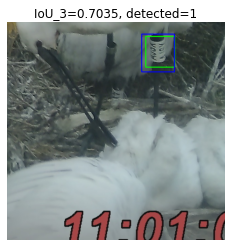

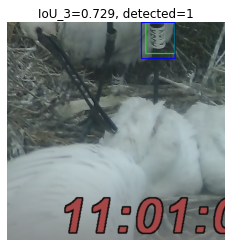

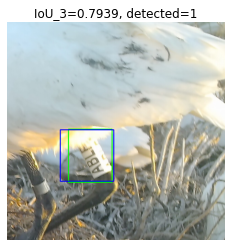

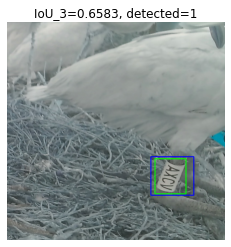

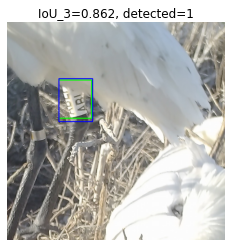

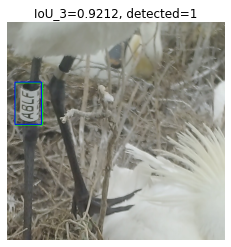

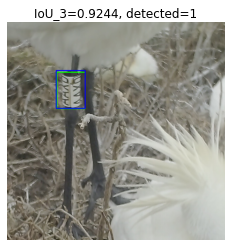

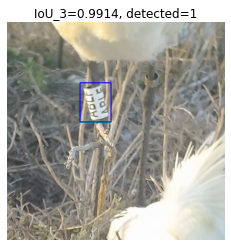

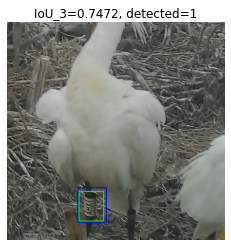

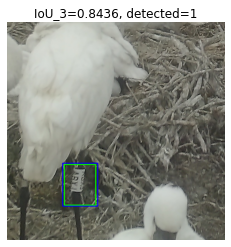

In [43]:
import numpy as np
from random import shuffle
import cv2

SAVE_DIR = ""

n_img_to_show = 0
photos = list(photos_with_tags.iterrows())
shuffle(photos)
for image in photos[:10]:
    try:
        image_fn = image[1]["image"]
        while image_fn.find("/") != -1:
            image_fn = image_fn[image_fn.index("/")+1:]
        iou = image[1]["IoU_0.3"]
        n_det = image[1]["Det_n_tags_0.3"]
        
        img = plt.imread(os.path.join(IMAGE_DIR, image_fn))
        
        gt_bboxes = clean_bboxes(image[1]["Gt_bboxes"])
        det_bboxes = clean_bboxes(image[1]["Det_bboxes_0.3"])
        for x1,y1,x2,y2 in gt_bboxes:
            img = cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
            
        for x1,y1,x2,y2 in det_bboxes:
            img = cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 2)
            
            
        plt.figure()
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"IoU_3={round(iou, 4)}, detected={n_det}")
        plt.savefig(os.path.join(SAVE_DIR, "metrics"+image_fn))
    except:
        continue

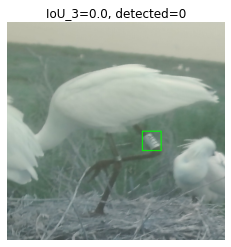

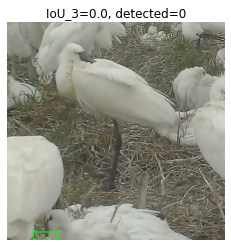

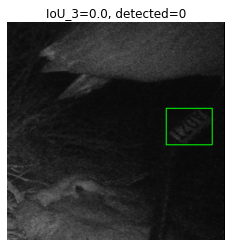

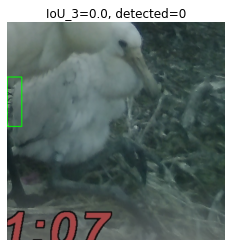

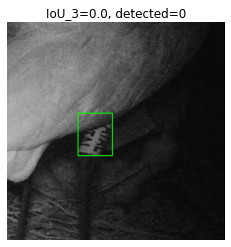

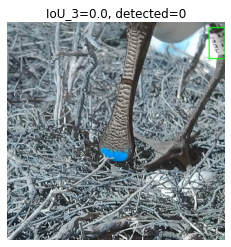

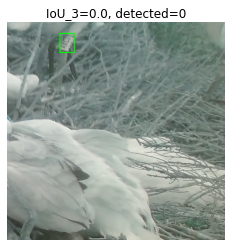

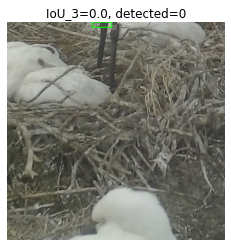

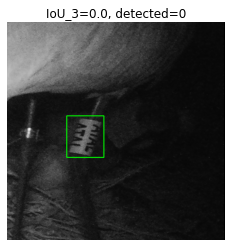

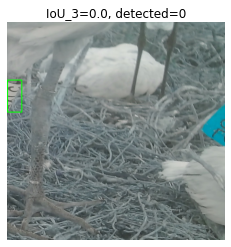

In [44]:
import numpy as np
from random import shuffle
import cv2

SAVE_DIR = "/media/antoine/Maxtor/SelectionSpatules/detections"
n_img_to_show = 0
photos = list(photos_with_tags[photos_with_tags["Det_n_tags_0.3"]<0.6].iterrows())
shuffle(photos)
for image in photos[:10]:
    try:
        image_fn = image[1]["image"]
        while image_fn.find("/") != -1:
            image_fn = image_fn[image_fn.index("/")+1:]
        iou = image[1]["IoU_0.3"]
        n_det = image[1]["Det_n_tags_0.3"]
        img = plt.imread(os.path.join(IMAGE_DIR, image_fn))
        gt_bboxes = clean_bboxes(image[1]["Gt_bboxes"])
        det_bboxes = clean_bboxes(image[1]["Det_bboxes_0.3"])
        for x1,y1,x2,y2 in gt_bboxes:
            img = cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
            
        for x1,y1,x2,y2 in det_bboxes:
            img = cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 2)

            
        plt.figure()
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"IoU_3={round(iou, 4)}, detected={n_det}")
        plt.savefig(os.path.join(SAVE_DIR, "metrics"+image_fn))
    except:
        continue

In [39]:
metrics.corr()

,Unnamed: 0,Gt_n_tags,IoU_0.3,Gt_area_0.3,Det_area_0.3,Det_n_tags_0.3,IoU_0.7,Gt_area_0.7,Det_area_0.7,Det_n_tags_0.7
Unnamed: 0,1.000000,0.010069,-0.000589,0.006796,0.002164,0.004005,-0.011612,0.006796,0.009359,0.009602
Gt_n_tags,0.010069,1.000000,-0.093700,0.900362,0.220790,0.157089,-0.216522,0.900362,0.414310,0.334432
IoU_0.3,-0.000589,-0.093700,1.000000,-0.061907,-0.843861,-0.914304,0.504883,-0.061907,-0.408556,-0.450893
Gt_area_0.3,0.006796,0.900362,-0.061907,1.000000,0.246593,0.161895,-0.153150,1.000000,0.462132,0.342917
Det_area_0.3,0.002164,0.220790,-0.843861,0.246593,1.000000,0.928540,-0.487330,0.246593,0.571680,0.554605
Det_n_tags_0.3,0.004005,0.157089,-0.914304,0.161895,0.928540,1.000000,-0.473457,0.161895,0.492170,0.516629
IoU_0.7,-0.011612,-0.216522,0.504883,-0.153150,-0.487330,-0.473457,1.000000,-0.153150,-0.804128,-0.885882
Gt_area_0.7,0.006796,0.900362,-0.061907,1.000000,0.246593,0.161895,-0.153150,1.000000,0.462132,0.342917
Det_area_0.7,0.009359,0.414310,-0.408556,0.462132,0.571680,0.492170,-0.804128,0.462132,1.000000,0.957243
Det_n_tags_0.7,0.009602,0.334432,-0.450893,0.342917,0.554605,0.516629,-0.885882,0.342917,0.957243,1.000000
